# Implimentation of Batch Gradient Descent (BGD) algorithem in TensorFlow
- Nalinda Kulathunga (nalinda05kl@gmail.com). <br>
Texas Southern University.
****
- #### Introduction :
Gradient descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of gradient descent is to tweek parameters iteratively in order to minimize the cost function [1]. Following example demonstrate the implimentation of batch gradient descent algorithem on california housing price data set. I also included a summary of theory behind gradient descent algorithem for a better understanding of the process.

- ####  General (expected) equation with optimized (OP) weights : <br>
$y^{i}$ = $\theta_{0}^{op}x_{0}^{i} + \theta_{1}^{op}x_{1}^{i} + ..... + \theta_{j}^{op}x_{j}^{i} + ..... + \theta_{n}^{op}x_{n}^{i}$ <br>
where, $y^{i}$ is the target for the $i^{th}$ data entry and $x_{j}^{i}$ is the $j^{th}$ feature value of $i^{th}$ data entry. Targets for this problem are the california housing prices and the features are the values of identified factors that might affect the targets. Wight ($\theta_{j}$) is the strength of the $j^{th}$ feature when predicting the targets. We start with random initialization of the weights. <br>
(NOTE: Index for the number of data entries : $i$ ($i_{max} = m$), Index for the number of features: $j$ ($j_{max} = n$)).

- #### Matrix reperesentation : <br>
$\hat{\textbf{y}} = \textbf{X}\theta$ <br>
$\left[ \begin{array}{cccc} y^{1} \\ y^{2} \\ \vdots \\ y^{m}\end{array} \right]$ = $\left[ \begin{array}{cccc}
x_{0}^{1} & x_{1}^{1} & \ldots & x_{n}^{1} \\
x_{0}^{2} & x_{1}^{2} & \ldots & x_{n}^{2} \\
\vdots & \vdots & \ldots & \vdots \\
x_{0}^{m} & x_{1}^{m} & \ldots & x_{n}^{m} \\
\end{array} \right]$ 
$\left[ \begin{array}{cccc} 
\theta_{0} \\
\theta_{1} \\
\vdots \\
\theta_{n} \\
\end{array} \right]$

- #### Weights : <br>
$\theta_{j}$, ($\theta_{0}$ is the bias term)

- #### Predicted $i^{th}$ target can be written as : <br>
$y_{pred}^{i}$ = $\sum_{j=0}^n \theta_{j} x_{j}^{i}$ <br>
For all targets, by using the matrix dot product, <br> $\hat{\textbf{y}}_{pred}$ = $\theta^{T} . X$ <br>
Using the matrix product, <br> $\hat{\textbf{y}}_{pred}$ = $X\theta$

- #### Mean Square Error (MSE) cost function for linear regression model : <br>
$MSE(X,\theta) = \frac{1}{m} \sum_{i=0}^{m} (y_{pred}^{(i)} - y^{(i)})^{2}$ <br>
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; = \frac{1}{m} \sum_{i=0}^{m} (\theta^{T}.x^{(i)} - y^{(i)})^{2}$

- #### Partial derivative of the cost function : <br>
$\frac{\partial}{\partial \theta_{j}} MSE(X,\theta) = \frac{2}{m} \sum_{i=0}^{m} (\theta^{T}.x^{(i)} - y^{(i)})x_{j}^{(i)}$ <br>
In general matrix form, with all gradients, <br>
$\nabla_{\theta} MSE(\theta) = \left[ \begin{array}{cccc} 
\frac{\partial}{\partial \theta_{0}} MSE(\theta) \\
\frac{\partial}{\partial \theta_{1}} MSE(\theta) \\
\vdots \\
\frac{\partial}{\partial \theta_{n}} MSE(\theta) \\
\end{array} \right] = \frac{2}{m}X^{T}(X\theta - \textbf{y})$

- #### Optimization algorithem with a learning rate - $\eta$ : <br>
$\theta^{(next)}$ = $\theta^{(now)} - \eta \nabla_{\theta} MSE(\theta)$
****
- #### References :
[1]. Hands on machine learning with Scikit-Learn & TensorFlow, by Aurelien Geron (2017). <br>
[2]. TensorFlow documentation : https://www.tensorflow.org/  <br>
[3]. Jypyter Notebook : https://jupyter.org/  <br>
****
#### Implimentation :


In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Number of iterations and the learning rate
n_epochs = 150000 #optimal for presentation
learning_rate = 0.001 #optimal for presentation

#n_epochs = 10000
#learning_rate = 0.01

In [3]:
# Downloading the dataset:
from sklearn.datasets import fetch_california_housing

In [4]:
housing = fetch_california_housing()
m, n = housing.data.shape

In [5]:
print "Feature space shape: {}".format(housing.data.shape)
print "Target space shape: {}".format(housing.target.shape)

Feature space shape: (20640, 8)
Target space shape: (20640,)


In [6]:
print "X = {}".format(housing.data[:5])

X = [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]


In [7]:
print "y = {}".format(housing.target[:5])

y = [4.526 3.585 3.521 3.413 3.422]


In [8]:
#Scaling the data and adding the bias term:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(housing.data)
scaled_housing_data = scaler.transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

In [9]:
# for presentation: optimal test fraction = 0.9
from sklearn.model_selection import train_test_split
Xd, Xd_test, yd, yd_test = train_test_split(scaled_housing_data_plus_bias, housing.target, test_size=0.9, random_state=1)

In [10]:
print Xd.shape
print Xd_test.shape
print yd.shape
print yd_test.shape

(2064, 9)
(18576, 9)
(2064,)
(18576,)


In [11]:
print "X_for_training = \n {}".format(Xd[:5])

X_for_training = 
 [[ 1.         -0.72401758 -1.16322546  0.11301404 -0.11316493 -0.42958481
   0.00371819  1.79696493 -0.98343503]
 [ 1.          0.34121344  1.29997497  0.08407495 -0.0688294  -0.07459745
  -0.0659106  -1.37734001  1.19776621]
 [ 1.          0.28310131  1.85618152 -0.30046362 -0.07696672  0.52764478
  -0.13279515  1.00104776 -1.43265267]
 [ 1.         -0.70464687  0.8232265  -0.68499001 -0.15616211  1.07072246
   0.02424108 -0.74528814  0.62376588]
 [ 1.         -0.76533825 -0.2891866  -0.26350034 -0.21475169  0.14881499
  -0.10014463 -0.76401561  1.2626532 ]]


In [16]:
# Preparing the tensors for the session ahead:
X           = tf.constant(Xd, dtype=tf.float32, name="X")
y           = tf.constant(yd.reshape(-1, 1), dtype=tf.float32, name="y")

X_test      = tf.constant(Xd_test, dtype=tf.float32, name="X_test")
y_test      = tf.constant(yd_test.reshape(-1, 1), dtype=tf.float32, name="y_test")

theta       = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")

y_pred      = tf.matmul(X, theta, name="predictions")
y_pred_from_test = tf.matmul(X_test, theta, name="predictions_from_test")

error       = y_pred - y
error_from_test = y_pred_from_test - y_test

mse         = tf.reduce_mean(tf.square(error), name="mse")
mse_from_test = tf.reduce_mean(tf.square(error_from_test), name="mse_from_test")

# Manually calculating the gradients:
gradients   = (float(2))/(float(m)) * (tf.matmul(tf.transpose(X), error))
training_op = tf.assign(theta, theta - learning_rate * gradients)

## In-built momentum optimizer: 
#optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.5)
#training_op = optimizer.minimize(mse)

In [17]:
# Shapes of tensors:
print X
print y
print theta
print y_pred

Tensor("X_1:0", shape=(2064, 9), dtype=float32)
Tensor("y_1:0", shape=(2064, 1), dtype=float32)
<tf.Variable 'theta_1:0' shape=(9, 1) dtype=float32_ref>
Tensor("predictions_1:0", shape=(2064, 1), dtype=float32)


In [18]:
# Initialization of the tensorflow variables:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

100% |########################################################################|


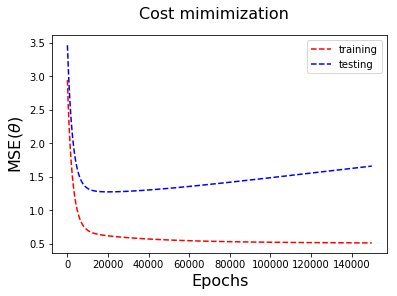

In [19]:
# Plot that updates with the entries:
import matplotlib.pyplot as plt
import numpy
import time

fig = plt.figure()
fig.suptitle('Cost mimimization', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel(r'MSE($\theta$)', fontsize=16)
ax = fig.add_subplot(111)
ax_test = fig.add_subplot(111)

# For ploting:
xx = []
yy = []
yy_test = []

li,      = ax.plot(xx, yy,'r--')
li_test, = ax_test.plot(xx, yy_test, 'b--')

plt.gca().legend(('training','testing'))

from progressbar import ProgressBar
pbar = ProgressBar()

# Initiation of the session and running the optimization:
with tf.Session() as sess:
    
    sess.run(init)
    for epoch in pbar(range(n_epochs)):
        if epoch % 100 == 0:
            
            # Checkpoint every 100 epochs:
            save_path = saver.save(sess, "/Users/nalindakulathunga/Programing_Learn/TensorFlow_NN/my_model.ckpt")
            
            xx.append(epoch)
            yy.append(mse.eval())
            yy_test.append(mse_from_test.eval())

            # set the new data
            li.set_xdata(xx)
            li.set_ydata(yy)
            li_test.set_xdata(xx)
            li_test.set_ydata(yy_test)

            ax.relim() 
            ax.autoscale_view(True,True,True) 
            ax_test.relim() 
            ax_test.autoscale_view(True,True,True)

            fig.canvas.draw()
            
        sess.run(training_op)
    best_theta = theta.eval()
    save_path = saver.save(sess, "/Users/nalindakulathunga/Programing_Learn/TensorFlow_NN/my_model_final.ckpt")

#### NOTE: <br>
This example work is not an "optimized" work. I just wanted to show the causes of overfitting while showing how the TensorFlow takes care of model-training. Therefore, I made the training set very small (10%) and test sample very large (90%) and trained the model too long (150K epochs with a rlatively small learning rate). In the above figure, the overfitting can be seen clearly (after the epoch ~ 10000, the test error starts to increase while the training error keep decreasing). This can be used as a good demonstration for the students to explain the concept of overfitting too. 

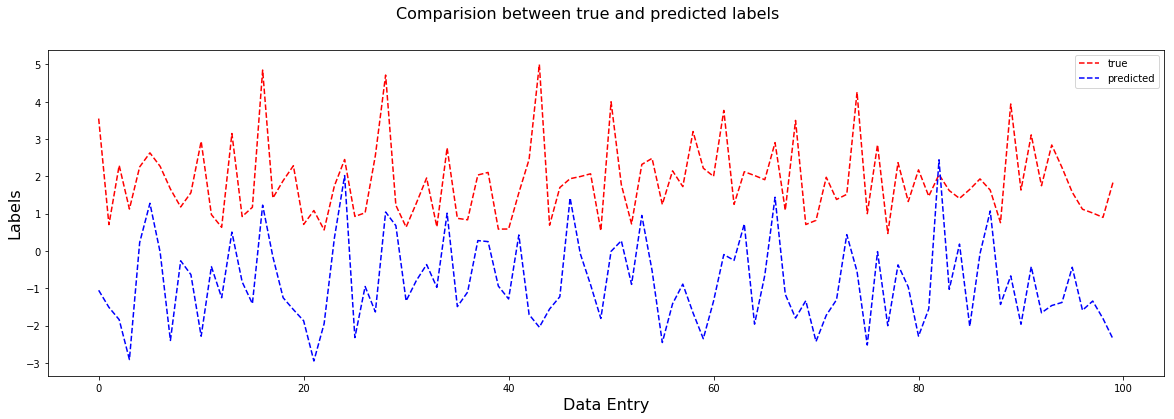

In [20]:
y_test_pred_after_FullTrain = tf.matmul(X_test, best_theta, name="best_predictions_from_test")
init = tf.global_variables_initializer()

with tf.Session() as sess: 
    sess.run(init)
        
    t=y_test.eval()
    t_list = list(range(len(t)))
    
    fig = plt.figure(figsize=(20,6))
    fig.suptitle('Comparision between true and predicted labels', fontsize=16)
    plt.xlabel('Data Entry', fontsize=16)
    plt.ylabel('Labels', fontsize=16)
    
    plt.plot(t_list[:100], y_test.eval()[:100], 'r--', t_list[:100], y_pred_from_test.eval()[:100], 'b--')
    plt.gca().legend(('true','predicted'))
    plt.show()